In [1]:
# 일반 회원들의 sequence 추출

# 이슈 회원들의 sequence 추출

# 일반 회원과 이슈 회원을 SID(x-axis), Support(y-axis) 별로 비교

In [25]:
# 글로벌 하게 사용할 객체 선언

# sid corpus
sid_list = {}
sid_index = 0

# SDB (temporary memory storage)
sdb = []

In [52]:
# Load the data
import csv
import pandas as pd

# Non issue users
no_issue_seq_data = pd.read_csv('./data/IP_SPLIT_NO_ISSUE_USERS_SEQ.csv')
# Issue users
issue_seq_data = pd.read_csv('./data/IP_SPLIT_ISSUE_USERS_SEQ.csv')

In [4]:
# Data of the non issue users
no_issue_seq_data.head(10)

,ID,IP,SEQUENCE_PARSE
0,1,119.67.115,"<76,77,73,24,21,21,78,161,101,152,100,152,59,1..."
1,2,211.104.55,"<161,24,24,161,24,161,101,152,100,152,161,4,16..."
2,3,1.235.19,"<161,78,80,76,77,73,27,101,150,100,150,106,80,..."
3,4,66.249.69,"<161,4,161,4,161,4,161,4,161,4,161,4,161,4,161..."
4,5,46.229.168,<161>
5,6,211.39.150,"<161,4,161,4,161,4,161,4,161,4,161,4,161,4,161..."
6,7,103.67.235,<161>
7,8,66.249.75,"<161,157,161,4,161,4,161,4,161,4,161,4,161,4,1..."
8,9,115.139.19,"<161,152,78,80,161,78,80>"
9,10,159.203.125,<161>


In [5]:
# Note. 현재 데이터가 유니크하게 존재하지 않는 문제가 있음 
# Data of the issue users
issue_seq_data.head(10)

,ID,userId,TEMP_IP_SPLIT2,BLACK_SEQUENCE_PARSE
0,1,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
1,2,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
2,3,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
3,4,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
4,5,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
5,6,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
6,7,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
7,8,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
8,9,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
9,10,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."


In [6]:
# 시퀸스의 시작, 종료 토큰을 제외한 아이템을 콤마(',') 를 기준으로 분리하여
# 아이템 배열을 만들어서 리턴해준다
def sequence_tokenize(seq):
    return seq.replace('<', '').replace('>', '').split(',')

In [7]:
# bi, tri 등 어떤 ngram 을 만들지와 시퀸스 하나를 받아
# ngram dictionary 를 만들어서 리턴해준다
def extract_ngram(n, seq_items):
    result = []
    for idx, item in enumerate(seq_items):
        window_set = seq_items[idx:idx + n]
        if len(window_set) == n:
            result.append(','.join([str(x) for x in window_set]))
    return result

In [8]:
from collections import defaultdict

# 전에 data set 을 받아 ngram 을 만들어 리턴
def extract_ngram_set(n, seq_datas):
    # 아직 나타나지 않은 ngram 을 0 값에서 시작시키기 위해 디폴트 값을 사용
    result = defaultdict(int)
    for index, row in seq_datas.iterrows():
        # ngram 을 추출
        ngram = extract_ngram(n, sequence_tokenize(row['SEQUENCE_PARSE']))
        # ngram dictionary 에 저장
        for item in ngram:
            result[item] += 1
    return pd.DataFrame(result.items(), columns=['sequence', 'support'])

In [12]:
# 글로벌 sdb 에 추출한 시퀸스들을 등록하는 함수
# def save_to_sdb(list, type='normal'):
    

In [31]:
# 매개변수로 전달된 시퀸스의 SID 를 리턴하는 함수
def get_sid(sequence):
    global sid_list
    global sid_index
    if sequence in sid_list:
        return sid_list[sequence]
    else:
        sid_list[sequence] = sid_index
        sid_index += 1
        return sid_list[sequence]

In [17]:
# 비-이슈 회원들의 ngram 을 추출
normal_ngram = extract_ngram_set(5, no_issue_seq_data)
# 가장 많이 나타나는 패턴 순으로 확인하기 위해 support 값 순으로 정렬
normal_ngram.sort_values(['support'], ascending=[False]).head(10)

,sequence,support
11284,"161,4,161,4,161",228904
310,"4,161,4,161,4",227343
71932,"150,29,150,29,150",79738
12475,"152,30,152,30,152",50382
97530,"29,150,29,150,29",47638
114599,"30,152,30,152,30",42774
74032,"29,150,150,29,150",30409
60301,"150,29,150,150,29",28027
72632,"29,150,29,150,150",27312
41648,"150,150,29,150,29",26043


In [44]:
normal_ngram = pd.DataFrame(normal_ngram)
normal_ngram['SID'] = 0
normal_sid = []
for index, row in normal_ngram.iterrows():
    #normal_ngram.loc[index]['SID'] = get_sid(normal_ngram.loc[index]['sequence'])
    normal_sid.append(get_sid(row['sequence']))
normal_sid

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [45]:
normal_ngram['SID'] = pd.Series(normal_sid)
normal_ngram

,sequence,support,SID
0,"147,150,100,150,29",1,0
1,"115,147,89,80,83",1,1
2,"137,13,92,150,137",1,2
3,"113,147,33,115,148",9,3
4,"161,27,76,161,27",1,4
5,"103,147,89,76,86",2,5
6,"113,147,33,115,147",1,6
7,"33,115,147,74,147",1,7
8,"152,130,30,152,4",1,8
9,"147,89,76,86,13",22,9


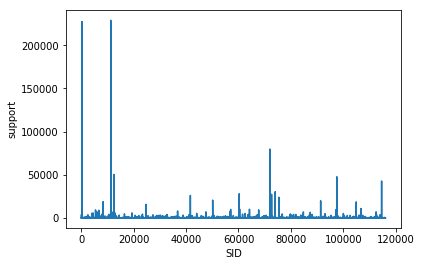

In [47]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = normal_ngram['SID']
y = normal_ngram['support']

plt.xlabel('SID')
plt.ylabel('support')

plt.plot(x, y)
plt.show()

In [34]:
test_df = [];
test_df.append({ 'id': 1, 'support': 30 })
test_df.append({ 'id': 2, 'support': 40 })
test_df.append({ 'id': 3, 'support': 50 })
test_df.append({ 'id': 4, 'support': 60 })

test_df = pd.DataFrame(test_df)

In [39]:
test_df['SID'] = 0
for index, row in test_df.iterrows():
    test_df.loc[index]['SID'] = index
test_df

,id,support,SID
0,1,30,0
1,2,40,1
2,3,50,2
3,4,60,3


In [53]:
# 이슈 회원들의 ngram 을 추출
issue_ngram = extract_ngram_set(5, issue_seq_data)
# 가장 많이 나타나는 패턴 순으로 확인하기 위해 support 값 순으로 정렬
issue_ngram.sort_values(['support'], ascending=[False]).head(10)

,sequence,support
608,"103,103,103,103,103",6613
344,"148,148,113,114,148",3652
600,"102,101,102,101,102",3593
19,"101,102,101,102,101",3593
272,"102,101,103,103,103",3112
287,"115,154,115,102,101",2818
2,"102,101,103,115,154",2729
601,"102,101,102,101,103",2681
125,"103,115,154,115,102",2621
140,"101,103,115,154,115",2472


In [ ]:
normal_ngram.sort_values(['support'], ascending=[False]).head(10)

In [ ]:
normal_ngram.head(10)

In [ ]:
# 분석을 위해 support 를 rel-support 값으로 변환
normal_ngram_support = normal_ngram['support']
normal_ngram_support_sum = normal_ngram['support'].sum()

In [54]:
issue_ngram = pd.DataFrame(issue_ngram)
issue_ngram['SID'] = 0
issue_sid = []
for index, row in issue_ngram.iterrows():
    #normal_ngram.loc[index]['SID'] = get_sid(normal_ngram.loc[index]['sequence'])
    issue_sid.append(get_sid(row['sequence']))
issue_sid

[116097,
 116098,
 116099,
 116100,
 116101,
 116102,
 116103,
 116104,
 116105,
 116106,
 116107,
 116108,
 116109,
 116110,
 116111,
 116112,
 116113,
 116114,
 116115,
 116116,
 116117,
 116118,
 116119,
 116120,
 116121,
 116122,
 116123,
 116124,
 116125,
 116126,
 116127,
 116128,
 116129,
 116130,
 116131,
 116132,
 116133,
 116134,
 116135,
 116136,
 116137,
 116138,
 116139,
 116140,
 116141,
 116142,
 116143,
 116144,
 116145,
 116146,
 116147,
 116148,
 116149,
 116150,
 116151,
 116152,
 116153,
 116154,
 116155,
 116156,
 116157,
 116158,
 116159,
 116160,
 116161,
 116162,
 116163,
 116164,
 116165,
 116166,
 116167,
 116168,
 116169,
 116170,
 116171,
 116172,
 116173,
 116174,
 116175,
 116176,
 116177,
 116178,
 116179,
 116180,
 116181,
 116182,
 116183,
 116184,
 116185,
 116186,
 116187,
 116188,
 116189,
 116190,
 116191,
 116192,
 116193,
 116194,
 116195,
 116196,
 116197,
 116198,
 116199,
 116200,
 116201,
 116202,
 116203,
 116204,
 116205,
 116206,
 116207,
 

In [55]:
issue_ngram['SID'] = pd.Series(issue_sid)
issue_ngram

,sequence,support,SID
0,"148,148,148,107,148",389,116097
1,"103,103,148,102,101",778,116098
2,"102,101,103,115,154",2729,116099
3,"138,110,148,112,74",106,116100
4,"89,88,89,138,89",46,116101
5,"148,113,114,148,74",95,116102
6,"74,138,102,101,138",48,116103
7,"101,103,103,103,102",1167,116104
8,"112,89,74,102,101",106,116105
9,"85,138,89,89,85",95,116106
